# Decision Tree 

In this notebook, I implement the decision tree based on the * **Shill Bidding Dataset** *, including decision tree classification and decision tree regression.

I implement the algorithm with the notes defined in * **Lecture 8.1 Decision and Regression Trees.** *.

## Algorithm Inplement

---

## Decision Tree Classifier

Import the libraries and data set.

In [1]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Import the data
df = pd.read_csv("../3. Data/Shill_Bidding_Dataset.csv")
df.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


We create the training set and testing set.

In [3]:
X = df.drop(['Record_ID','Auction_ID','Bidder_ID','Class'],axis=1)
y = df.Class

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

We import ```DecisionTreeClassfier``` from Scikit-Learn and train on the trianing set. The max depth of trees we chose is 5.

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate an instance of the DecisionTreeClassifier model
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
# Train the model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

Then we use the ```plot_tree``` and ```export_text``` functions to show the tree rules.

We predict on the testing data using established decision tree class and do the performance analysis by showing the confusion matrix and classification report.

cf_matrix = [[1697    2]
 [   8  190]] 



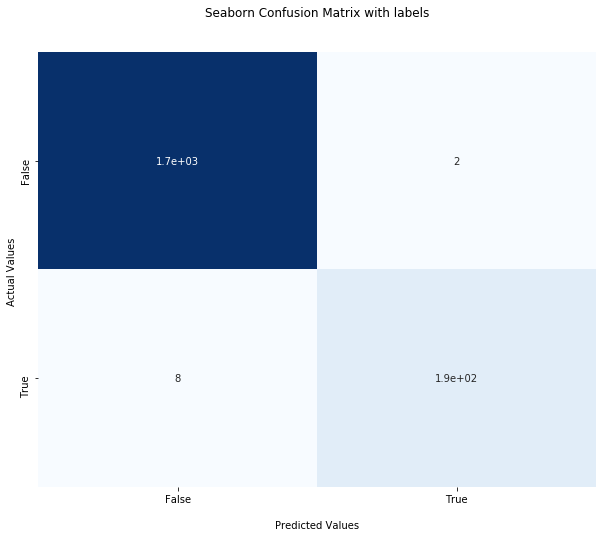

In [5]:
# predicted values on the testing data
y_pred = decision_tree.predict(X_test)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [6]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1699
          1       0.99      0.96      0.97       198

avg / total       0.99      0.99      0.99      1897



The accuracy of decision tree with max_depth = 5 is 99%, which is very good when compared with other classification models. We will do an experiment with different max_depth.

### Experiment with different max_depth

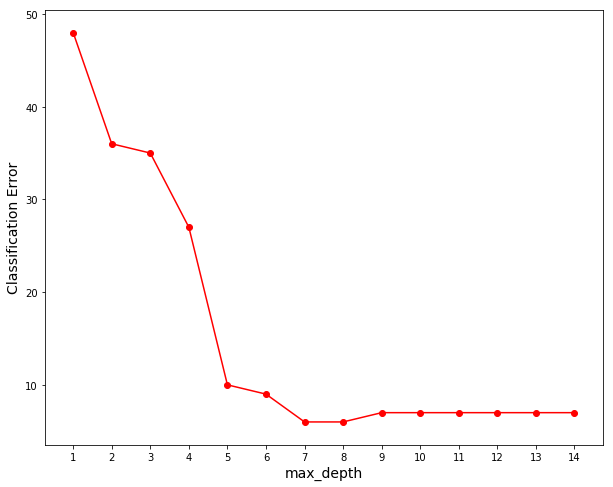

In [7]:
# Experiment with different max_depth
depths = [x for x in range(1, 15)]
errors = []
for depth in depths:
    decision_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    error = sum(y_pred != y_test)
    errors.append(error)

plt.figure(figsize = (10, 8))
plt.plot(depths, errors, color = 'red')
plt.scatter(depths, errors, color = 'red')
plt.xlabel('max_depth', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(depths)
plt.show()

We can see that the decision tree classifier model has the highest accuracy at max_depth = 7. Therefore, we instantiate an instance of ```DecisionTreeClassifier``` class with max_depth = 7 and then fit on the training set. 

cf_matrix = [[1697    2]
 [   4  194]] 



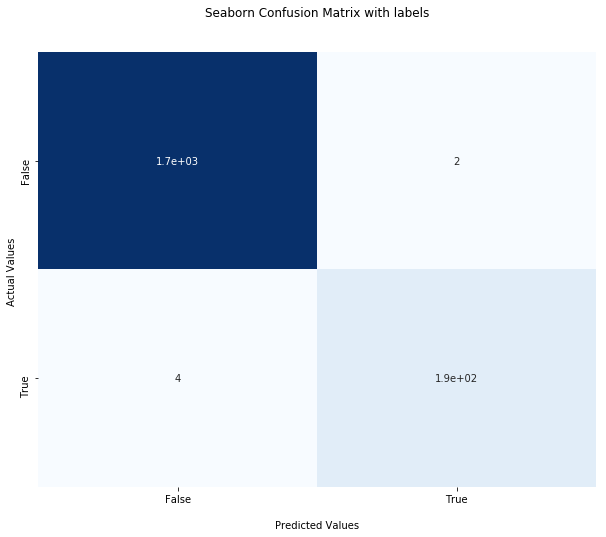

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1699
          1       0.99      0.98      0.98       198

avg / total       1.00      1.00      1.00      1897



In [8]:
# Instantiate an instance of the DecisionTreeClassifier model
decision_tree = DecisionTreeClassifier(max_depth=7, random_state=42)
# Train the model
decision_tree.fit(X_train, y_train)

# predicted values on the testing data
y_pred = decision_tree.predict(X_test)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

The accuracy for decision tree model is nearly 100%, which is a little bit better than the models with max_depth =5. 

## Decision Tree Regressor

In this part, we will apply Decision Tree Regressor from scikit-learn. Still use the same dataset, and the response variable changed to 'Winning_Ratio' which is a continuous variable.

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(['Record_ID','Auction_ID','Bidder_ID','Winning_Ratio','Auction_Duration','Class'],axis=1) # the response variables
y = df.Winning_Ratio                    # the exploratory variable

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
# Instantiate an instance of the DecisionTreeRegressor model with max_depth = 4
reg = DecisionTreeRegressor(max_depth=4, random_state=23)
reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=23, splitter='best')

In [11]:
y_pred = reg.predict(X_test)
print(f"MSE for reg is: {mean_squared_error(y_test, y_pred)} \n")
print(f"The R^2 for reg is: {round(r2_score(y_test, y_pred), 3)}")

MSE for reg is: 0.009790681935646242 

The R^2 for reg is: 0.948


The $R^2$ value shows that the decision tree regressor predicts well. Now let's try to do some experiment with different max_depth.

### Experiments with different max_depth values.

Text(0.5,1,'adjusted $R^2$ for different max_depth')

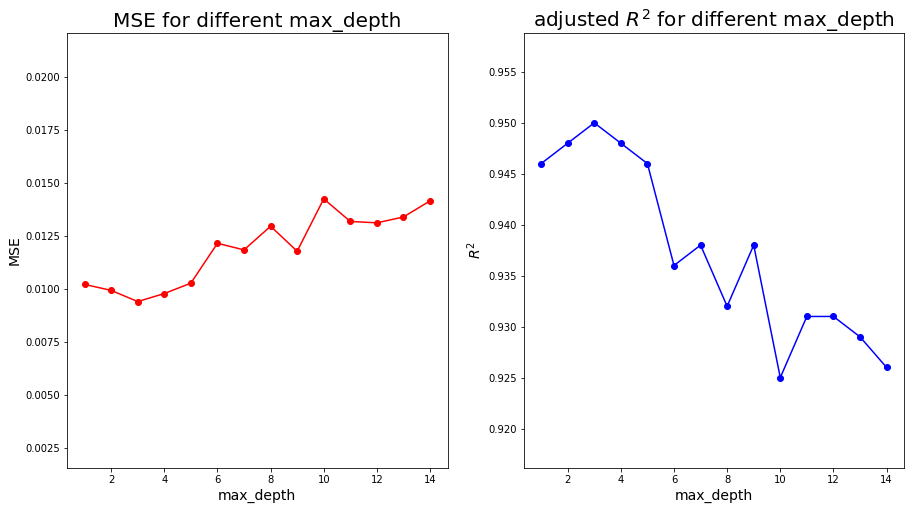

In [12]:
# Experiment with different max_depth
depths = [x for x in range(1, 15)]
MSE = []
R2 = []
for depth in depths:
    reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    MSE.append(mse)
    r2 = round(r2_score(y_test, y_pred), 3)
    R2.append(r2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

ax1.scatter(depths, MSE, color = "red")
ax1.plot(depths, MSE, color = 'red')
ax1.set_xlabel("max_depth", fontsize = 14)
ax1.set_ylabel("MSE", fontsize = 14)
ax1.set_title('MSE for different max_depth', fontsize = 20)

ax2.scatter(depths, R2, color = "blue")
ax2.plot(depths, R2, color = 'blue')
ax2.set_xlabel("max_depth", fontsize = 14)
ax2.set_ylabel("$R^2$", fontsize = 14)
ax2.set_title('adjusted $R^2$ for different max_depth', fontsize = 20)


The maximum of adjusted $R^2$ is lager than 0.95. As the max_depth increases, the value of adjuested $R^2$ even decreases. The decision tree regressor performs best at max_depth=3.